In [1]:
import pandas as pd
import numpy as np

Attribute Information:

Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

Age at the time of analysis. 18-36 (0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

Accident or serious trauma 1) yes, 2) no. (0, 1)

Surgical intervention 1) yes, 2) no. (0, 1)

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

Number of hours spent sitting per day ene-16 (0, 1)

Output: Diagnosis normal (N), altered (O)



In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/fertility_Diagnosis.txt',sep=",",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [3]:
#the dataset is missing the first row of the attribute desc
df.columns=['Season','Age','Child_disease','Accident/trauma', 'Surigical_intervention','H_fever','Alchohol','Smoking','Hours spent sitting','Output']
df.head()

,Season,Age,Child_disease,Accident/trauma,Surigical_intervention,H_fever,Alchohol,Smoking,Hours spent sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [4]:
df.tail()

,Season,Age,Child_disease,Accident/trauma,Surigical_intervention,H_fever,Alchohol,Smoking,Hours spent sitting,Output
95,-1.0,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.0,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.0,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.0,0.64,1,0,1,0,1.0,0,0.19,N
99,-1.0,0.69,0,1,1,0,0.6,-1,0.19,N


In [5]:
#data is already normalized
#Checking for outliers
df.describe()

,Season,Age,Child_disease,Accident/trauma,Surigical_intervention,H_fever,Alchohol,Smoking,Hours spent sitting
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. The mean value varies frequently from the median value of each column which is represented by 50%(50th percentile) in index column
2. There are not any notable differences between the 75th percentile and max values

Hence, this suggests that there are NO outliers.

In [6]:
df.nunique()

Season                     4
Age                       18
Child_disease              2
Accident/trauma            2
Surigical_intervention     2
H_fever                    3
Alchohol                   5
Smoking                    3
Hours spent sitting       14
Output                     2
dtype: int64

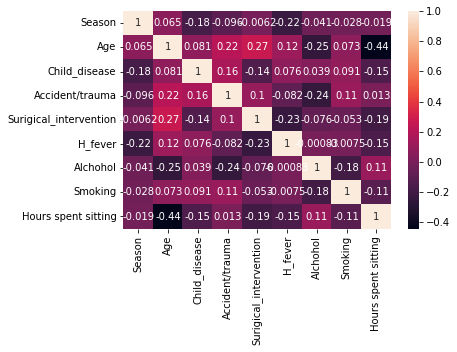

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

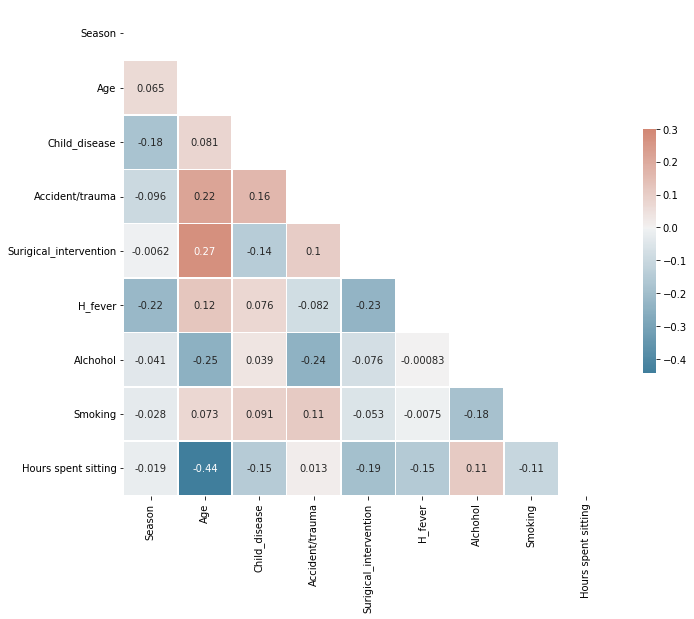

In [8]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

No strong correlation seen as of now.

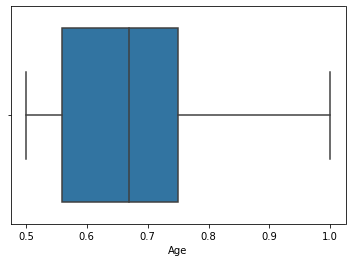

In [9]:
ax = sns.boxplot(x=df["Age"])

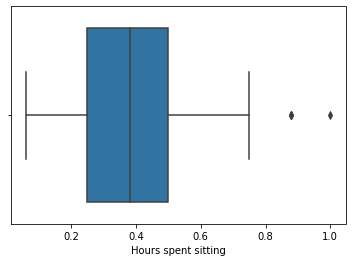

In [10]:
ax = sns.boxplot(x=df["Hours spent sitting"])

We see two outliers, we will remove them.

## IQR Treatment

In [11]:
upper_lim=df['Hours spent sitting'].quantile(0.90)
print(upper_lim)

0.63


In [12]:
df.loc[df['Hours spent sitting']>upper_lim,"Hours spent sitting"]=upper_lim

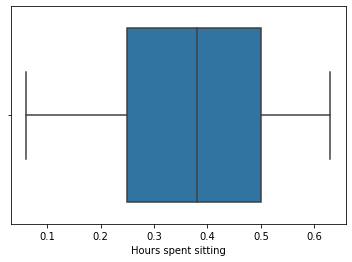

In [13]:
ax = sns.boxplot(x=df["Hours spent sitting"]) #Outliers removed

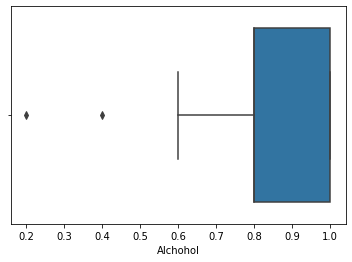

In [14]:
ax = sns.boxplot(x=df["Alchohol"])

In [15]:
lower_lim=df["Alchohol"].quantile(0.4)
print(lower_lim)

0.8


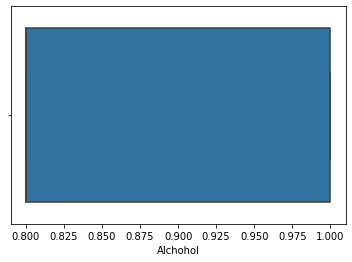

In [16]:
df.loc[df["Alchohol"]<lower_lim, "Alchohol"]=lower_lim
ax = sns.boxplot(x=df["Alchohol"])

Label Encoding the Output column

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Output"]=le.fit_transform(df["Output"])
df.head()

,Season,Age,Child_disease,Accident/trauma,Surigical_intervention,H_fever,Alchohol,Smoking,Hours spent sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.63,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


Creating the baseline model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [50]:
X=df.drop(["Output"],axis=1)
y=df["Output"]
test_sizes=[0.33,0.3,0.25,0.2,0.15,0.1]
acc={}
for i in test_sizes:
  X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=i,random_state=21)
  reg.fit(X_train,y_train)
  print(f"Training complete for test size:{i}.",end=" ")
  accuracy = reg.score(X_test,y_test)
  print("Accuracy:",accuracy*100,'%')
  y_pred = reg.predict(X_test)
  print('Coefficients: \n', reg.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))
  # Explained variance score: 1 is perfect prediction
  print('Variance score: %.2f' % reg.score(X_test, y_test))
  acc[i]=accuracy

Training complete for test size:0.33. Accuracy: 78.78787878787878 %
Coefficients: 
 [[-0.16598321  0.0255266  -0.12087223 -0.12033421 -0.20013131 -0.57962832
  -0.1815713   0.29442633  0.05975693]]
Mean squared error: 0.21
Variance score: 0.79
Training complete for test size:0.3. Accuracy: 76.66666666666667 %
Coefficients: 
 [[-0.16320866  0.00840655 -0.14760137 -0.10074671 -0.23254829 -0.561881
  -0.19792754  0.25281038  0.08105905]]
Mean squared error: 0.23
Variance score: 0.77
Training complete for test size:0.25. Accuracy: 76.0 %
Coefficients: 
 [[ 0.0754467   0.03349475 -0.49537155 -0.25127756 -0.03747728 -0.576927
  -0.25462342  0.31989954  0.14564582]]
Mean squared error: 0.24
Variance score: 0.76
Training complete for test size:0.2. Accuracy: 85.0 %
Coefficients: 
 [[ 0.30229652  0.2509755  -0.13852476 -0.69629786  0.13616403 -0.72243272
  -0.4509494   0.55760512  0.05036578]]
Mean squared error: 0.15
Variance score: 0.85
Training complete for test size:0.15. Accuracy: 86.66666

In [51]:
acc

{0.1: 0.8,
 0.15: 0.8666666666666667,
 0.2: 0.85,
 0.25: 0.76,
 0.3: 0.7666666666666667,
 0.33: 0.7878787878787878}

In [52]:
max_key = max(acc, key=acc.get)
print("Highest accuracy is of test size:",max_key)

Highest accuracy is of test size: 0.15
